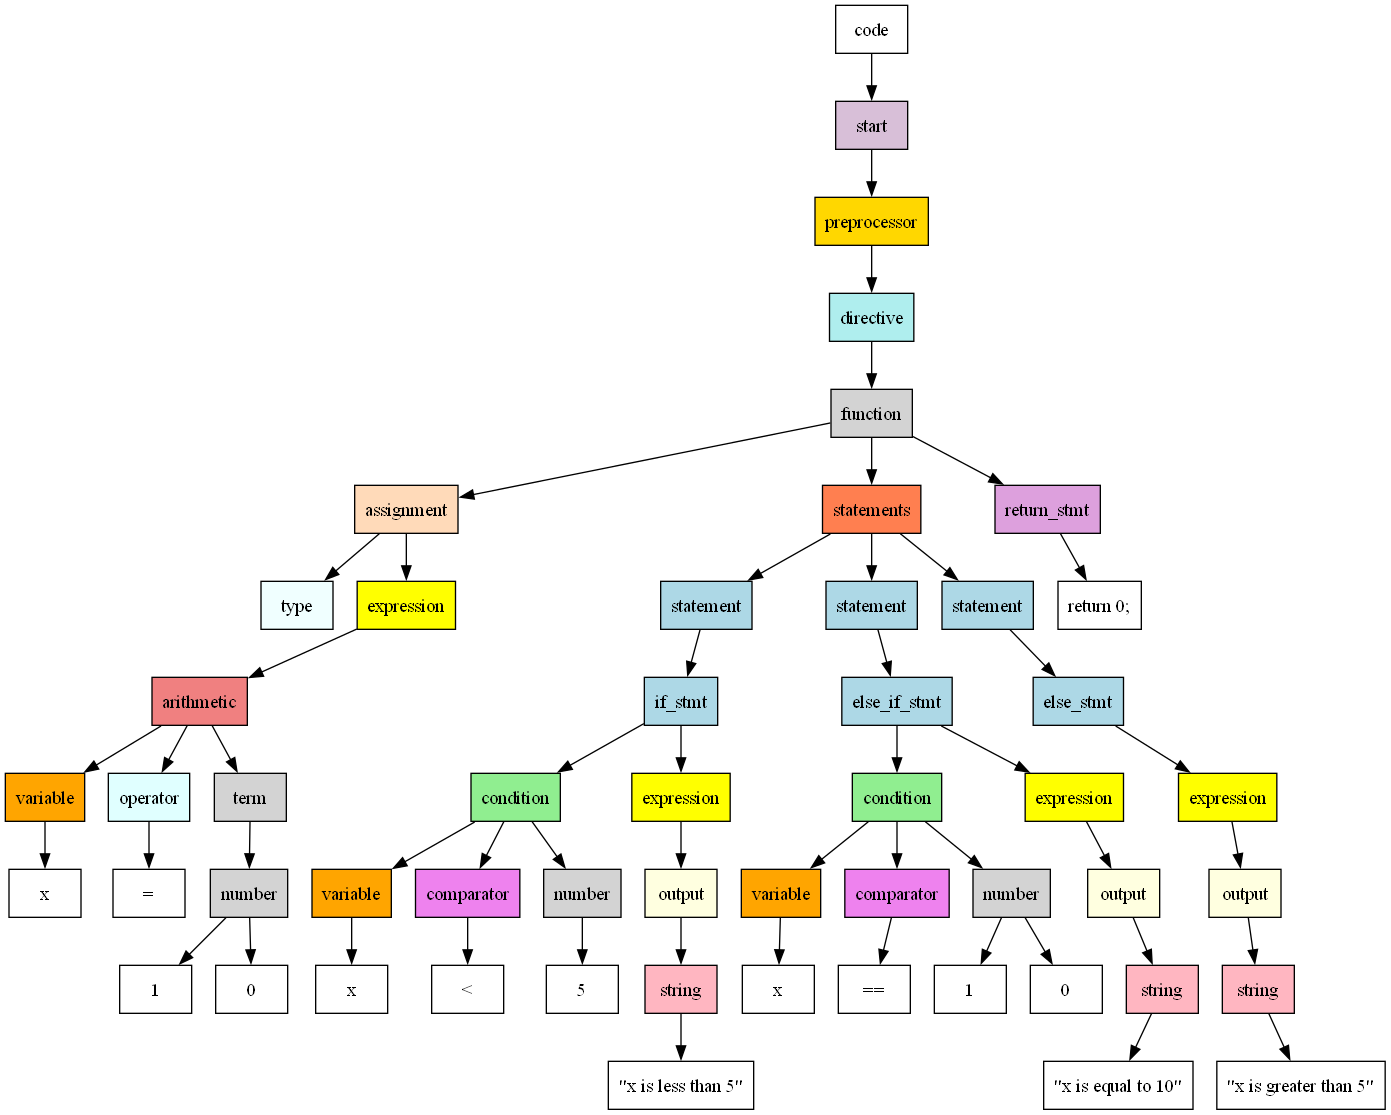

In [12]:
from lark import Lark
from graphviz import Digraph
from IPython.display import Image, display
import uuid

# Formal grammar use using Lark. 
# Note: Lark has its own EBNF-like grammar syntax. Some characters are omitted so it can be readable by the parser.
# The visualizer cannot output statement,comparators,return statement, and operator unless you define them as separate tokens.

grammar = r"""
start: preprocessor

preprocessor: "#include<iostream>" directive
directive: "using namespace std;" function
function: "int main () {" assignment statements return_stmt "}"
assignment: type expression ";"
type: "int" | "float" | "bool" | "string"

return_stmt: RS
RS: "return 0;"

statements: statement*

condition: "(" variable comparator number ")"
expression: arithmetic | output
output: "cout" "<<" string "<<" "end1"
arithmetic: variable operator term

#Define statement as tokens
statement: if_stmt | else_if_stmt | else_stmt
if_stmt: "if" condition "{" expression ";" "}" 
else_if_stmt: "else if" condition "{" expression ";" "}" 
else_stmt: "else" "{" expression ";" "}"

#Define operators as tokens
operator: ADD | MINUS | MUL | DIV | EQL
ADD: "+"
MINUS: "-"
MUL: "*"
DIV: "/"
EQL: "="

#Define comparators as tokens
comparator: EQ | NE | LT | GT | LE | GE
EQ: "=="
NE: "!="
LT: "<"
GT: ">"
LE: "<="
GE: ">="


term: number
variable: LETTER+
number: DIGIT+
string: ESCAPED_STRING
%import common.LETTER
%import common.DIGIT
%import common.ESCAPED_STRING
%import common.WS
%ignore WS

"""

# The given code to parse and visualize
code = """
#include<iostream>
using namespace std;
int main () {
    int x = 10;
    if (x < 5) {
        cout << "x is less than 5" << end1;
    }
    else if (x == 10) {
        cout << "x is equal to 10" << end1;
    }
    else {
        cout << "x is greater than 5" << end1;
    }
    return 0;
}
"""

# Parse the code
parser = Lark(grammar, start="start", parser="lalr")
tree = parser.parse(code)

# Design the tree
def get_color(label):
     return {
        'code': 'thistle',
        'start': 'thistle',
        'preprocessor': 'gold',
        'directive': 'paleturquoise',
        'function': 'lightgrey',
        'statement': 'lightblue',
        'condition': 'lightgreen',
        'comparator': 'violet',
        'expression': 'yellow',
        'variable': 'orange',
        'number': 'lightgrey',
        'string': 'lightpink',
        'arithmetic': 'lightcoral',
        'if_stmt': 'lightblue',
        'else_if_stmt': 'lightblue',
        'else_stmt': 'lightblue',
        'output': 'lightyellow',
        'operator': 'lightcyan',
        'term': 'lightgrey',
        'assignment': 'peachpuff',
        'type': 'azure',
        'statements':'coral',
        'return_stmt': 'plum',
        
        
    }.get(label, 'white')

    
# Function to build the parse tree using graphviz
def build_graphviz_tree(tree, graph=None, parent_id=None):
    if graph is None:
        graph = Digraph(format='png')
        graph.attr('node', shape='box')
    
    node_id = str(uuid.uuid4())
    label = tree.data if hasattr(tree, 'data') else str(tree)
    color = get_color(label)
    graph.node(node_id, label, style="filled", fillcolor=color)

    if parent_id:
        graph.edge(parent_id, node_id)
    else:
        graph.edge("code", node_id)

    for child in tree.children:
        if hasattr(child, 'children'):
            build_graphviz_tree(child, graph, node_id)
        else:
            leaf_id = str(uuid.uuid4())
            graph.node(leaf_id, str(child), style="filled", fillcolor="white")
            graph.edge(node_id, leaf_id)

    return graph

# Build the graph
graph = build_graphviz_tree(tree)
#Display in Jupyter
png_data = graph.pipe(format='png')  
display(Image(png_data))

